In [67]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu


# Таблица Clients

In [68]:
clients = pd.read_csv('Clients.csv', delimiter = ';')

In [69]:
clients['dtime_ad'] = pd.to_datetime(clients['dtime_ad'], format="%d.%m.%Y")
clients.dropna (axis = 0, subset = ['dtime_ad'], inplace = True)

In [70]:
clients.head()

,id_client,dtime_ad,nflag_test,id_trading_point
0,180844,2022-06-08,0,212
2,226069,2022-07-11,1,54
3,183981,2022-06-16,1,991
4,322530,2022-07-08,0,1015
5,254313,2022-06-19,1,453


In [71]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55356 entries, 0 to 55604
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_client         55356 non-null  int64         
 1   dtime_ad          55356 non-null  datetime64[ns]
 2   nflag_test        55356 non-null  int64         
 3   id_trading_point  55356 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.1 MB


# Таблица Data

In [72]:
data = pd.read_csv('Data.csv', delimiter = ';')

data = data[~((data['id_client'].isnull())|(data['amt_payment'].isnull())|(data['dtime_pay'].isnull()))]

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35828 entries, 0 to 37988
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_order     35828 non-null  int64  
 1   id_client    35828 non-null  float64
 2   amt_payment  35828 non-null  float64
 3   dtime_pay    35828 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 1.4+ MB


In [74]:
data.head(5)

,id_order,id_client,amt_payment,dtime_pay
0,100238,194569.0,5373.0,28.10.2022
1,100242,191056.0,4151.0,01.08.2022
2,100249,200049.0,5688.0,24.08.2022
3,100258,206161.0,4330.0,09.12.2022
4,100267,190945.0,5488.0,03.08.2022


In [75]:
data.sort_values(by = 'dtime_pay')
## проверили, что у нас остался только 22 год

,id_order,id_client,amt_payment,dtime_pay
33908,275182,200341.0,3253.0,00.01.1900
28822,248132,178805.0,5846.0,00.01.1900
22312,214776,178690.0,3249.0,00.01.1900
22495,215699,209045.0,4087.0,00.01.1900
20573,205874,198821.0,3888.0,00.01.1900
...,...,...,...,...
4089,120964,198340.0,4133.0,31.10.2022
34182,276648,197631.0,4826.0,31.10.2022
14549,174543,189547.0,5858.0,31.10.2022
7083,136217,190107.0,1119.0,31.10.2022


# Таблица Region_dict

In [76]:
region_dict = pd.read_csv('Region_dict.csv', delimiter = ';')

In [77]:
region_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_trading_point  66 non-null     int64 
 1   city              66 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [78]:
region_dict.head()

,id_trading_point,city
0,1,Петрозаводск
1,2,Дмитров
2,4,Чехов
3,7,Ростов Великий
4,11,Владимир


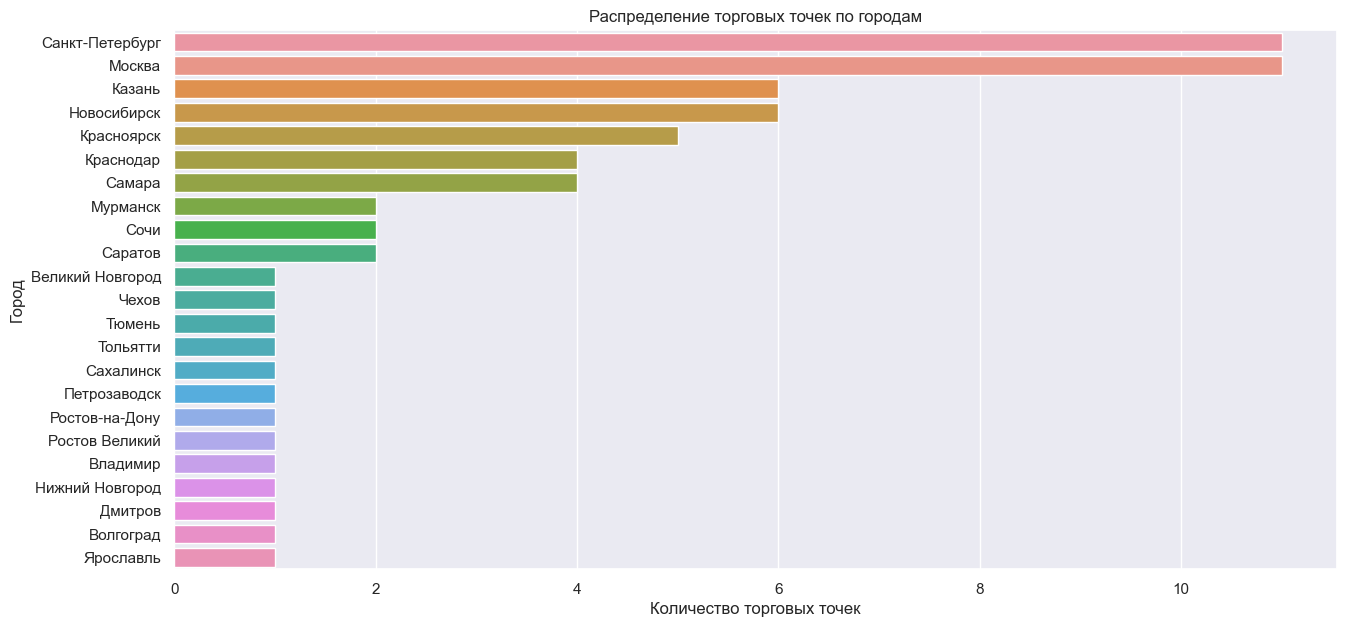

In [79]:
cities = region_dict.groupby('city')['id_trading_point'].count().reset_index().sort_values(by = 'id_trading_point', ascending = False)
sns.barplot(data = cities, x = cities['id_trading_point'], y = cities['city'])
plt.title('Распределение торговых точек по городам')
plt.xlabel('Количество торговых точек')
plt.ylabel('Город')
plt.show()

# Объединение таблиц

In [80]:
df = pd.merge(data, clients, on = 'id_client', how = 'outer')
df = pd.merge (df, region_dict, on = 'id_trading_point')

In [81]:
df

,id_order,id_client,amt_payment,dtime_pay,dtime_ad,nflag_test,id_trading_point,city
0,100238.0,194569.0,5373.0,28.10.2022,2022-07-12,1.0,1654.0,Москва
1,213184.0,194569.0,5141.0,18.08.2022,2022-07-12,1.0,1654.0,Москва
2,100271.0,183519.0,3727.0,11.09.2022,2022-06-15,1.0,1654.0,Москва
3,140099.0,183519.0,5858.0,21.10.2022,2022-06-15,1.0,1654.0,Москва
4,148219.0,183519.0,3908.0,11.07.2022,2022-06-15,1.0,1654.0,Москва
...,...,...,...,...,...,...,...,...
62528,NaN,287702.0,NaN,NaN,2022-06-16,1.0,13.0,Нижний Новгород
62529,NaN,264861.0,NaN,NaN,2022-08-02,1.0,13.0,Нижний Новгород
62530,NaN,313035.0,NaN,NaN,2022-07-04,0.0,13.0,Нижний Новгород
62531,NaN,312740.0,NaN,NaN,2022-06-11,1.0,13.0,Нижний Новгород


In [82]:
client_trpoint_payments = df.groupby(['id_client', 'id_trading_point', 'city']).agg({'id_order':'count', 'amt_payment':'sum'}).reset_index()
client_trpoint_payments['amt_payment'] = client_trpoint_payments['amt_payment'].fillna(0)

In [83]:
client_trpoint_payments

,id_client,id_trading_point,city,id_order,amt_payment
0,178561.0,453.0,Санкт-Петербург,1,3052.0
1,178562.0,2652.0,Москва,1,2439.0
2,178563.0,112.0,Санкт-Петербург,1,768.0
3,178564.0,26.0,Ростов-на-Дону,0,0.0
4,178565.0,739.0,Новосибирск,1,958.0
...,...,...,...,...,...
55351,331949.0,573.0,Санкт-Петербург,0,0.0
55352,331950.0,1654.0,Москва,0,0.0
55353,331954.0,544.0,Казань,0,0.0
55354,331955.0,72.0,Сочи,0,0.0


In [84]:
final_df = pd.merge(client_trpoint_payments, clients[['id_client', 'dtime_ad', 'nflag_test']], on = 'id_client')

In [85]:
final_df['paid'] = np.where(final_df['amt_payment'] == 0, 0, 1)
final_df.head(10)

,id_client,id_trading_point,city,id_order,amt_payment,dtime_ad,nflag_test,paid
0,178561.0,453.0,Санкт-Петербург,1,3052.0,2022-06-03,0,1
1,178562.0,2652.0,Москва,1,2439.0,2022-06-03,0,1
2,178563.0,112.0,Санкт-Петербург,1,768.0,2022-06-03,1,1
3,178564.0,26.0,Ростов-на-Дону,0,0.0,2022-06-03,1,0
4,178565.0,739.0,Новосибирск,1,958.0,2022-06-03,1,1
5,178566.0,866.0,Новосибирск,1,5474.0,2022-06-03,0,1
6,178567.0,453.0,Санкт-Петербург,1,2663.0,2022-06-03,0,1
7,178568.0,3786.0,Москва,3,13537.0,2022-06-03,1,1
8,178569.0,117.0,Санкт-Петербург,1,2008.0,2022-06-03,0,1
9,178570.0,80.0,Саратов,2,6651.0,2022-06-03,1,1


# Автоматизация статистических вычислений

In [86]:
def test_calc(r1, r2, alpha = 0.05):
    s,p = ttest_ind(r1,r2)
    print('Критерий Стьюдента = ', s, 'p-vlaue = ', p)
    if p < alpha:
        print('Гипотеза H0 не подтверждается: средние не равны')
        print('Разница средних = ', r1.mean()-r2.mean())
    else: 
        print('Гипотеза H0 подтверждается: средние равны')
        print('Разница средних = 0')

In [87]:
def mann_whitney_func(r1, r2, alpha = 0.05):
    s,p = mannwhitneyu (r1,r2)
    print('Критерий Манна-Уитни = ', s, 'p-vlaue = ', p)
    if p < alpha:
        print('Распределения не равны')
    else: print('Распределения равны')

# Чистка неверно заполненных точек

In [88]:
null_tt = []
not_test_control_tt = []

In [89]:
for tpoint in final_df['id_trading_point'].unique():
    
    filtered_df = final_df[final_df['id_trading_point'] == tpoint]
    sum_test = filtered_df[final_df['nflag_test'] == 1]['amt_payment'].sum()
    sum_control = filtered_df[final_df['nflag_test'] == 0]['amt_payment'].sum()
    if (sum_test == 0) or (sum_control == 0):
        null_tt.append(tpoint)
print(null_tt)

C:\Users\lybas\AppData\Local\Temp\ipykernel_14612\3993469793.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sum_test = filtered_df[final_df['nflag_test'] == 1]['amt_payment'].sum()
C:\Users\lybas\AppData\Local\Temp\ipykernel_14612\3993469793.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sum_control = filtered_df[final_df['nflag_test'] == 0]['amt_payment'].sum()


[26.0, 739.0, 866.0, 46.0, 1099.0, 1015.0, 603.0, 810.0, 800.0, 228.0, 1.0, 13.0, 23.0, 4.0, 7.0]


In [90]:
for tpoint in final_df['id_trading_point'].unique():
    
    filtered_df = final_df[final_df['id_trading_point'] == tpoint]
    test = filtered_df[final_df['nflag_test'] == 1]['id_client'].count()
    control = filtered_df[final_df['nflag_test'] == 0]['id_client'].count()
#     print(tpoint, ' test=', test)
#     print(tpoint, 'control=', control)
    if (test == 0) or (control == 0):
        null_tt.append(tpoint)
print(null_tt)
        

C:\Users\lybas\AppData\Local\Temp\ipykernel_14612\976368484.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test = filtered_df[final_df['nflag_test'] == 1]['id_client'].count()
C:\Users\lybas\AppData\Local\Temp\ipykernel_14612\976368484.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  control = filtered_df[final_df['nflag_test'] == 0]['id_client'].count()


[26.0, 739.0, 866.0, 46.0, 1099.0, 1015.0, 603.0, 810.0, 800.0, 228.0, 1.0, 13.0, 23.0, 4.0, 7.0, 739.0, 866.0, 1099.0, 1015.0, 603.0, 810.0, 800.0, 228.0]


# Расчет общих результатов АБ Теста

In [91]:
error_tt = null_tt + not_test_control_tt

In [92]:
final_df = final_df[~final_df['id_trading_point'].isin(error_tt)]
final_df.head(10)

,id_client,id_trading_point,city,id_order,amt_payment,dtime_ad,nflag_test,paid
0,178561.0,453.0,Санкт-Петербург,1,3052.0,2022-06-03,0,1
1,178562.0,2652.0,Москва,1,2439.0,2022-06-03,0,1
2,178563.0,112.0,Санкт-Петербург,1,768.0,2022-06-03,1,1
6,178567.0,453.0,Санкт-Петербург,1,2663.0,2022-06-03,0,1
7,178568.0,3786.0,Москва,3,13537.0,2022-06-03,1,1
8,178569.0,117.0,Санкт-Петербург,1,2008.0,2022-06-03,0,1
9,178570.0,80.0,Саратов,2,6651.0,2022-06-03,1,1
10,178571.0,2652.0,Москва,1,3063.0,2022-06-03,1,1
11,178572.0,88.0,Тольятти,1,1828.0,2022-06-03,0,1
12,178573.0,80.0,Саратов,0,0.0,2022-06-03,1,0


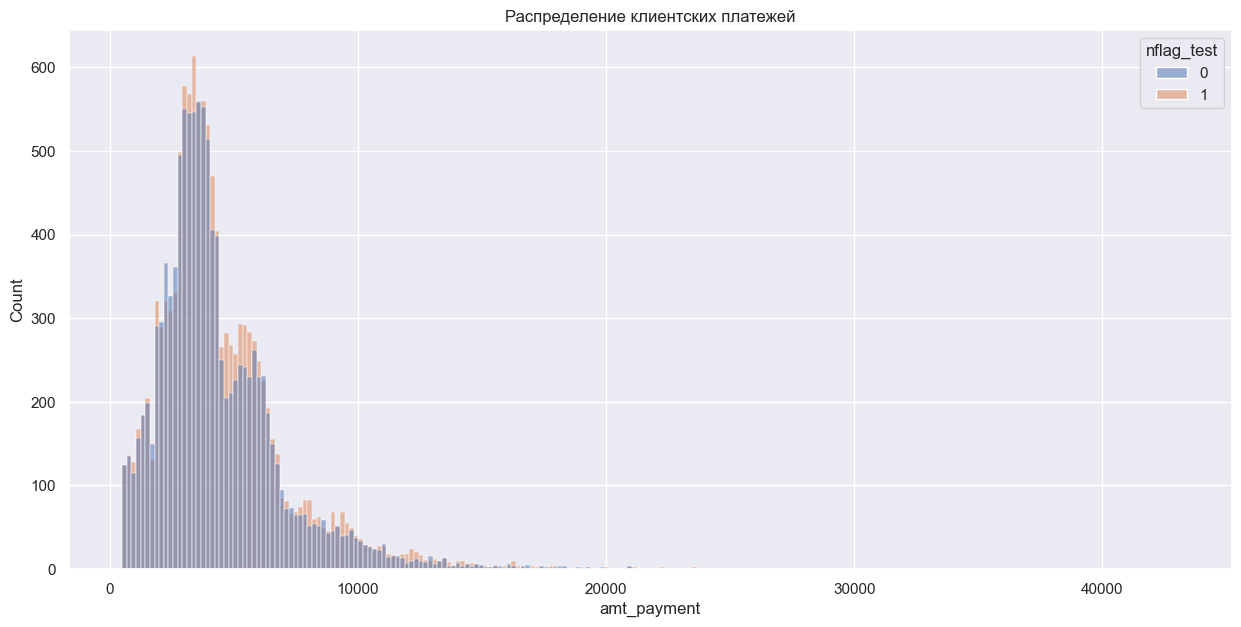

In [93]:
sns.set(rc={'figure.figsize':(15,7)})
sns.histplot(data=final_df[final_df['paid'] == 1], x="amt_payment", hue='nflag_test')
plt.title('Распределение клиентских платежей')
plt.show()

**Сравниваем средние платежи**

In [94]:
control = final_df[final_df['nflag_test'] == 0]['amt_payment']
test = final_df[final_df['nflag_test'] == 1]['amt_payment']

In [95]:
test_calc(test, control)

Критерий Стьюдента =  9.456798235171377 p-vlaue =  3.3214645838934018e-21
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  263.088912844727


In [96]:
mann_whitney_func(test, control)

Критерий Манна-Уитни =  270040116.0 p-vlaue =  3.008345273971901e-24
Распределения не равны


**Сравниваем конверсию**

In [97]:
control_conv = final_df[final_df['nflag_test'] == 0]['paid']
test_conv = final_df[final_df['nflag_test'] == 1]['paid']

In [98]:
test_calc(test_conv, control_conv)

Критерий Стьюдента =  9.282032730948323 p-vlaue =  1.7338073027564523e-20
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  0.043524040271688325


In [99]:
mann_whitney_func(test_conv, control_conv)

Критерий Манна-Уитни =  267864526.0 p-vlaue =  1.8043406994299902e-20
Распределения не равны


**Вывод:** если брать всю выборку полностью, то определенно средний чек и конверсия в тестовой группе лучше

# Сегментация результатов АБ Теста

**Москва**

In [100]:
df_Moscow = final_df[final_df['city'] == 'Москва']

In [101]:
control_moscow = df_Moscow[df_Moscow['nflag_test'] == 0]['amt_payment']
test_moscow = df_Moscow[df_Moscow['nflag_test'] == 1]['amt_payment']

In [102]:
# платежи
test_calc( test_moscow, control_moscow)

Критерий Стьюдента =  7.676511027843395 p-vlaue =  1.757549439555765e-14
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  381.7784892750842


In [103]:
# платежи
mann_whitney_func(test_moscow, control_moscow)

Критерий Манна-Уитни =  20595574.5 p-vlaue =  7.010591402203484e-16
Распределения не равны


In [104]:
control_conv_moscow = df_Moscow[df_Moscow['nflag_test'] == 0]['paid']
test_conv_moscow = df_Moscow[df_Moscow['nflag_test'] == 1]['paid']

In [105]:
# конверсия
test_calc( test_conv_moscow, control_conv_moscow)

Критерий Стьюдента =  6.190312288026297 p-vlaue =  6.194689260032549e-10
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  0.05557800593933432


In [106]:
# конверсия
mann_whitney_func(test_conv_moscow, control_conv_moscow)

Критерий Манна-Уитни =  20149937.0 p-vlaue =  6.370381156613038e-10
Распределения не равны


**Санкт-Петербург**

In [107]:
df_Spb = final_df[final_df['city'] == 'Санкт-Петербург']

In [108]:
control_spb = df_Spb[df_Spb['nflag_test'] == 0]['amt_payment']
test_spb = df_Spb[df_Spb['nflag_test'] == 1]['amt_payment']

In [109]:
# платежи
test_calc( test_spb, control_spb)

Критерий Стьюдента =  8.759635784179547 p-vlaue =  2.3198088937974163e-18
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  513.9039043833998


In [110]:
# платежи
mann_whitney_func(test_spb, control_spb)

Критерий Манна-Уитни =  10899685.5 p-vlaue =  2.0392184217953754e-20
Распределения не равны


In [111]:
control_conv_spb = df_Spb[df_Spb['nflag_test'] == 0]['paid']
test_conv_spb = df_Spb[df_Spb['nflag_test'] == 1]['paid']

In [112]:
# конверсия
test_calc(test_conv_spb, control_conv_spb)

Критерий Стьюдента =  9.352468686561785 p-vlaue =  1.065825659919673e-20
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  0.09877797751600403


In [113]:
# конверсия
mann_whitney_func(test_conv_spb, control_conv_spb)

Критерий Манна-Уитни =  10827979.0 p-vlaue =  1.3118606823466691e-20
Распределения не равны


**Другие города**

In [114]:
df_ohter = final_df[~final_df['city'].isin(['Москва', 'Санкт-Петербург'])]

In [115]:
control_ohter = df_ohter[df_ohter['nflag_test'] == 0]['amt_payment']
test_ohter = df_ohter[df_ohter['nflag_test'] == 1]['amt_payment']

In [116]:
# платежи
test_calc( test_ohter, control_ohter)

Критерий Стьюдента =  2.799833948375294 p-vlaue =  0.005116960359573606
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  112.47924441983105


In [117]:
# платежи
mann_whitney_func(test_ohter, control_ohter)

Критерий Манна-Уитни =  73908153.5 p-vlaue =  0.0049446987638856145
Распределения не равны


In [118]:
control_conv_ohter = df_ohter[df_ohter['nflag_test'] == 0]['paid']
test_conv_ohter = df_ohter[df_ohter['nflag_test'] == 1]['paid']

In [119]:
# конверсия
test_calc(test_conv_ohter, control_conv_ohter)

Критерий Стьюдента =  2.6871624139823846 p-vlaue =  0.007211139569659334
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  0.017278659314728717


In [120]:
# конверсия
mann_whitney_func(test_conv_ohter, control_conv_ohter)

Критерий Манна-Уитни =  73723807.0 p-vlaue =  0.0072137043853313
Распределения не равны


Санкт-Петербург
Критерий Стьюдента =  8.759635784179547 p-vlaue =  2.3198088937974163e-18
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  513.9039043833998
Число торговых точек: 8879


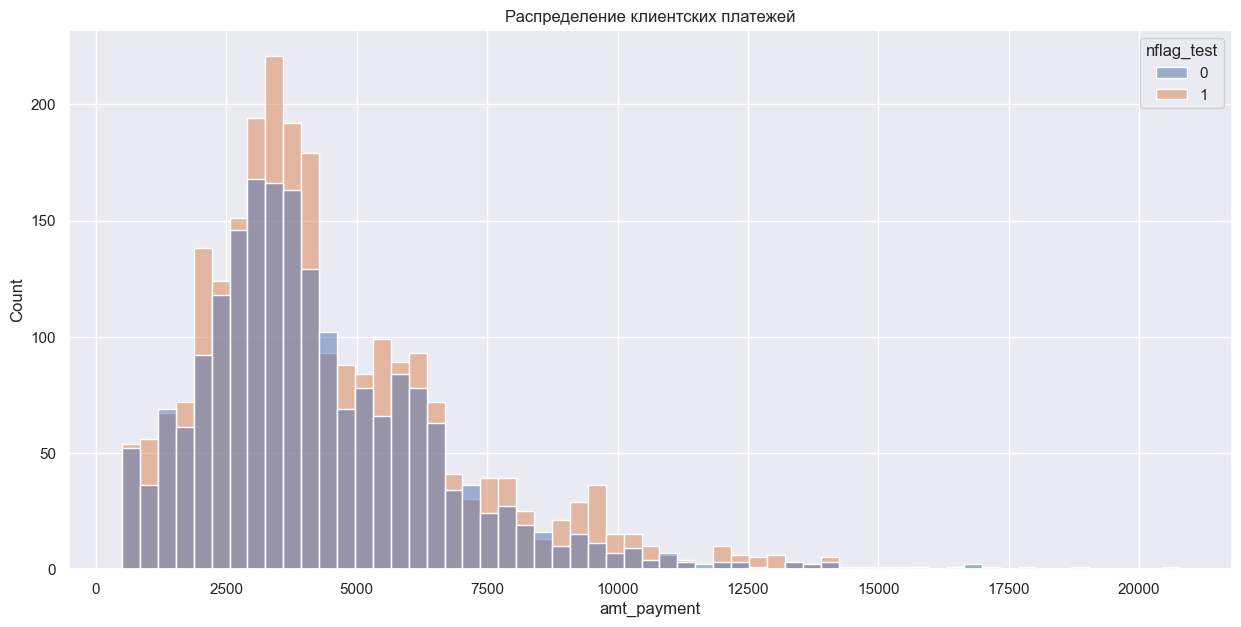

Москва
Критерий Стьюдента =  7.676511027843395 p-vlaue =  1.757549439555765e-14
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  381.7784892750842
Число торговых точек: 12358


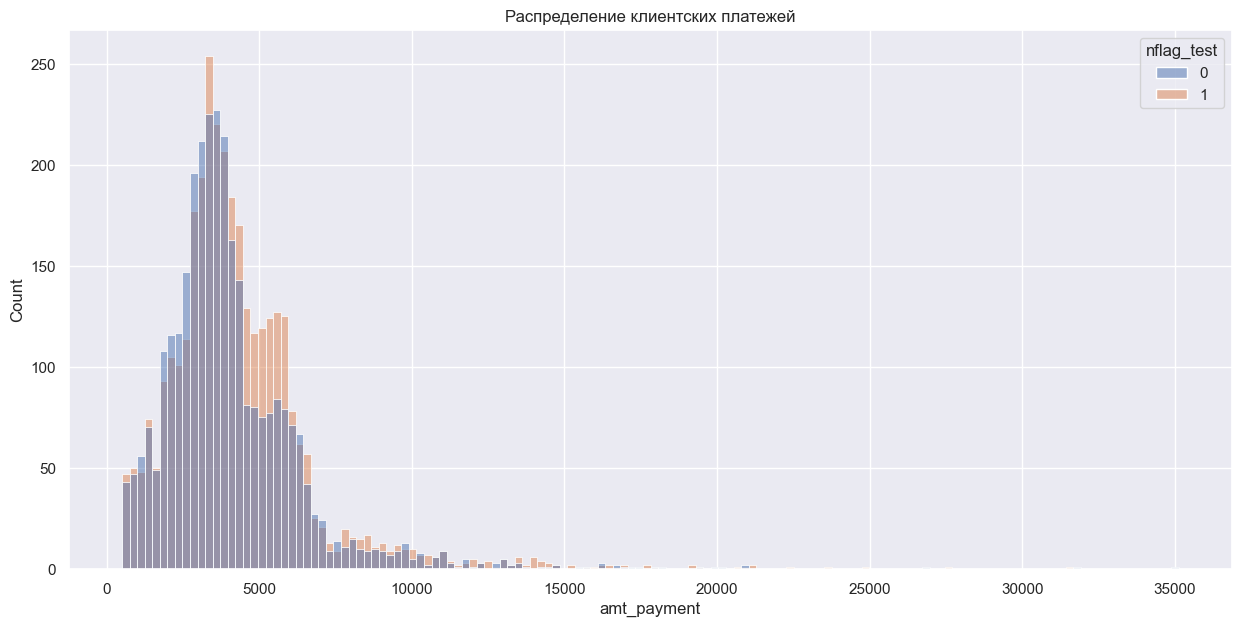

Саратов
Критерий Стьюдента =  -0.10516947629572568 p-vlaue =  0.9162512798549167
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Число торговых точек: 2122


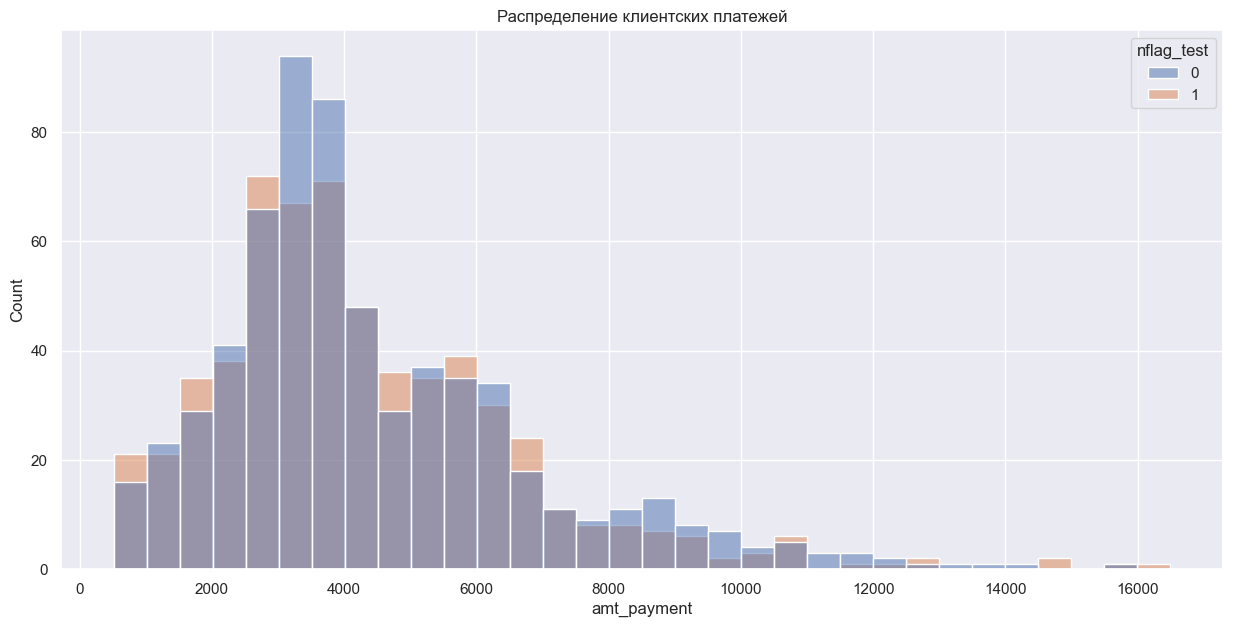

Тольятти
Критерий Стьюдента =  1.5045563456740754 p-vlaue =  0.1333273246710206
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Число торговых точек: 357


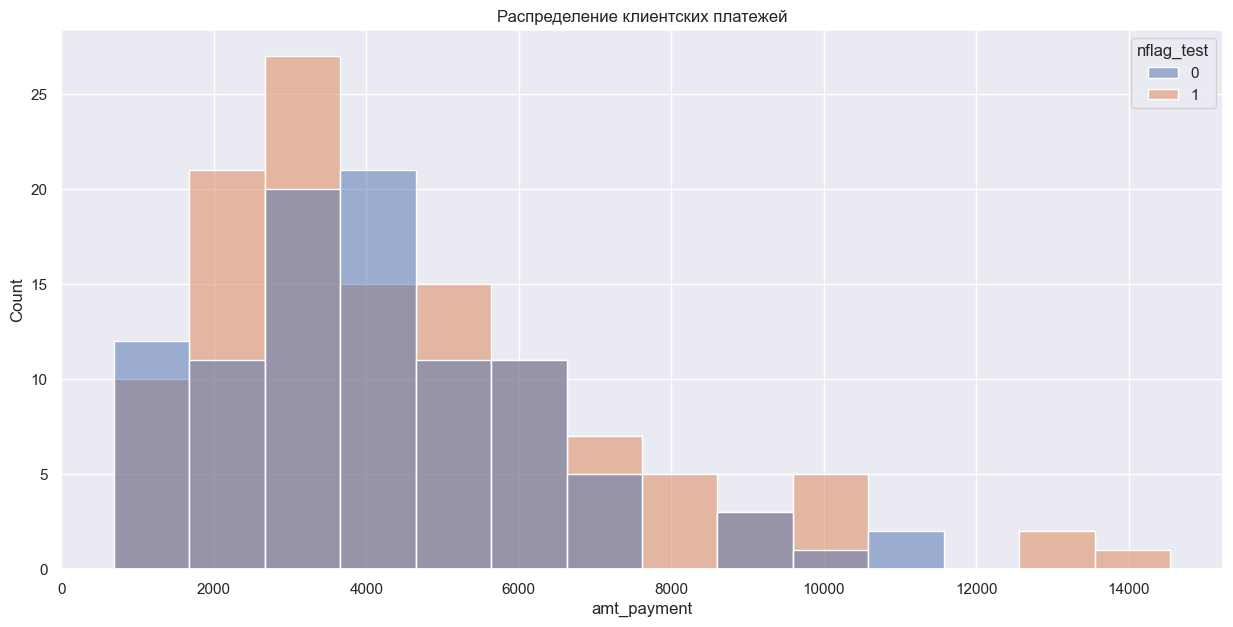

Владимир
Критерий Стьюдента =  2.5769554932923184 p-vlaue =  0.010095112170351712
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  438.6098419243094
Число торговых точек: 1117


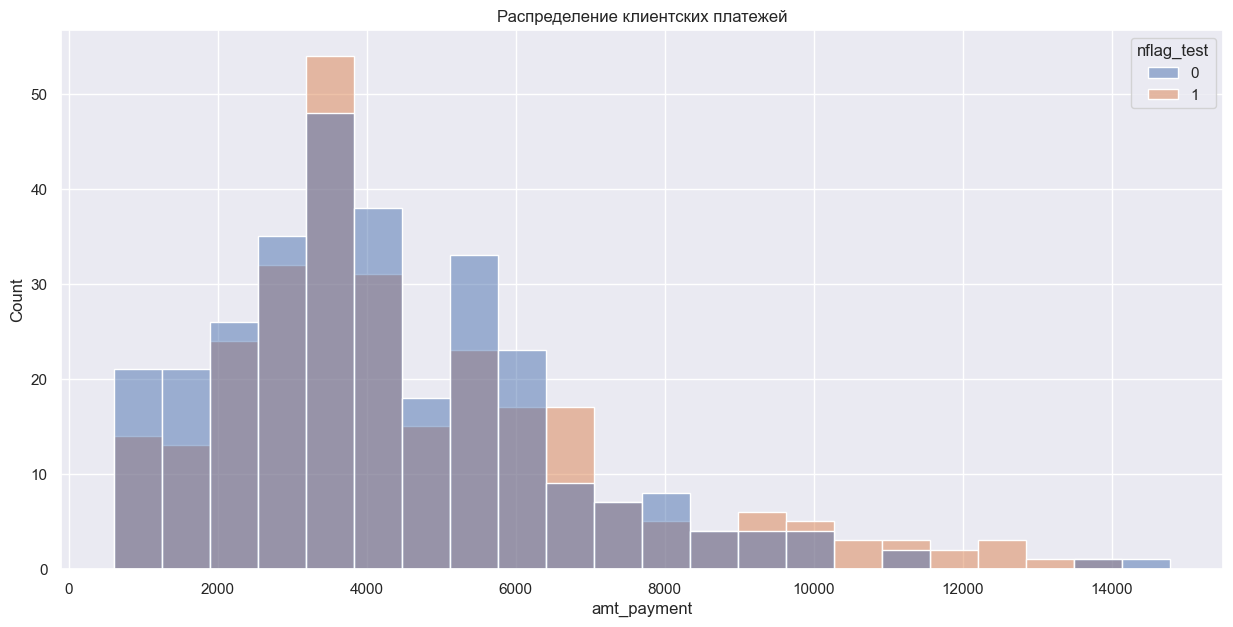

Мурманск
Критерий Стьюдента =  0.06902498862889384 p-vlaue =  0.9449762446327565
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Число торговых точек: 2120


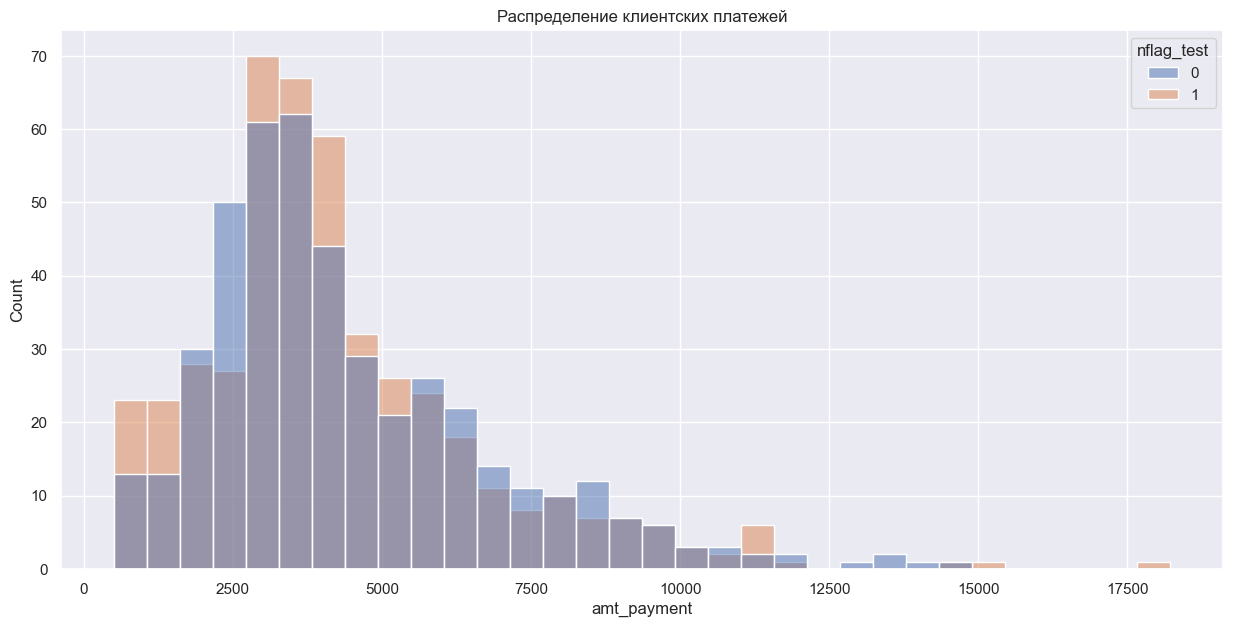

Красноярск
Критерий Стьюдента =  0.12000608689929208 p-vlaue =  0.9044823881233125
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Число торговых точек: 5937


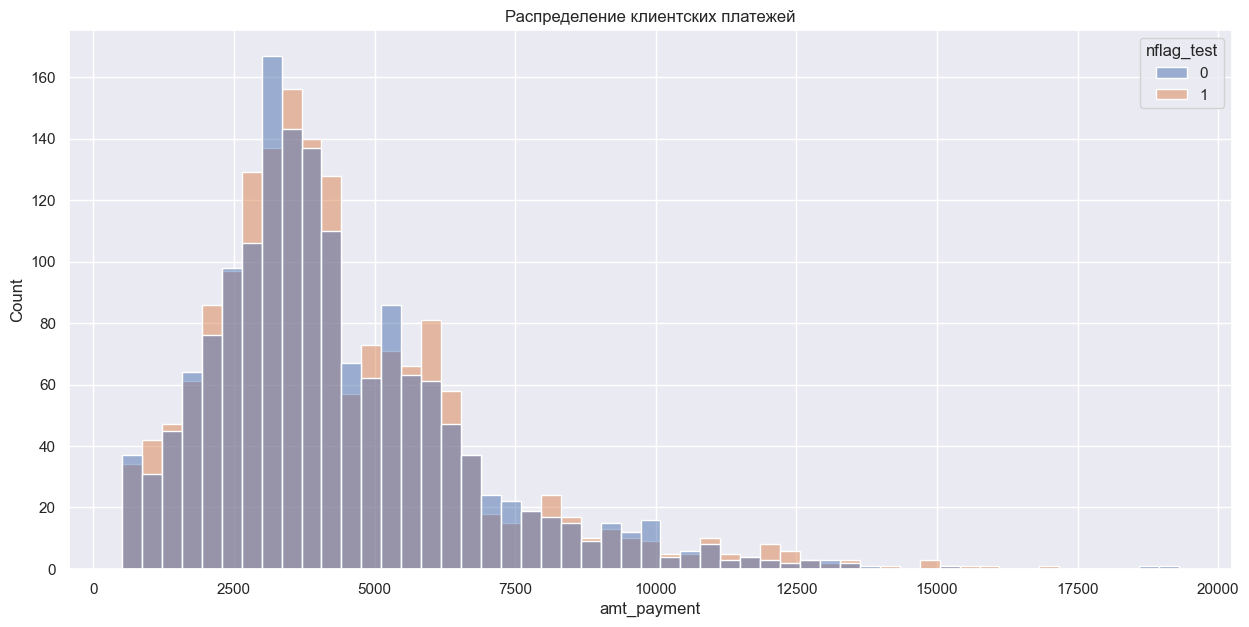

Казань
Критерий Стьюдента =  1.0655273408818378 p-vlaue =  0.286688049247618
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Число торговых точек: 5077


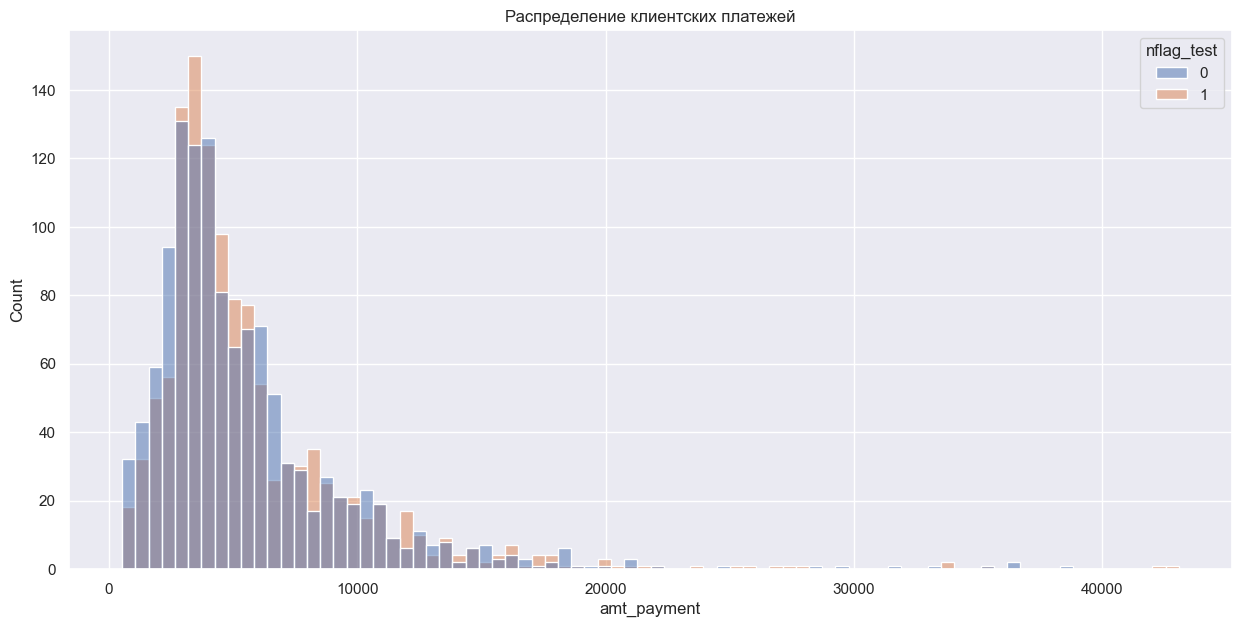

Самара
Критерий Стьюдента =  11.54083248253458 p-vlaue =  1.1014020778472052e-29
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  1544.3720191247648
Число торговых точек: 1648


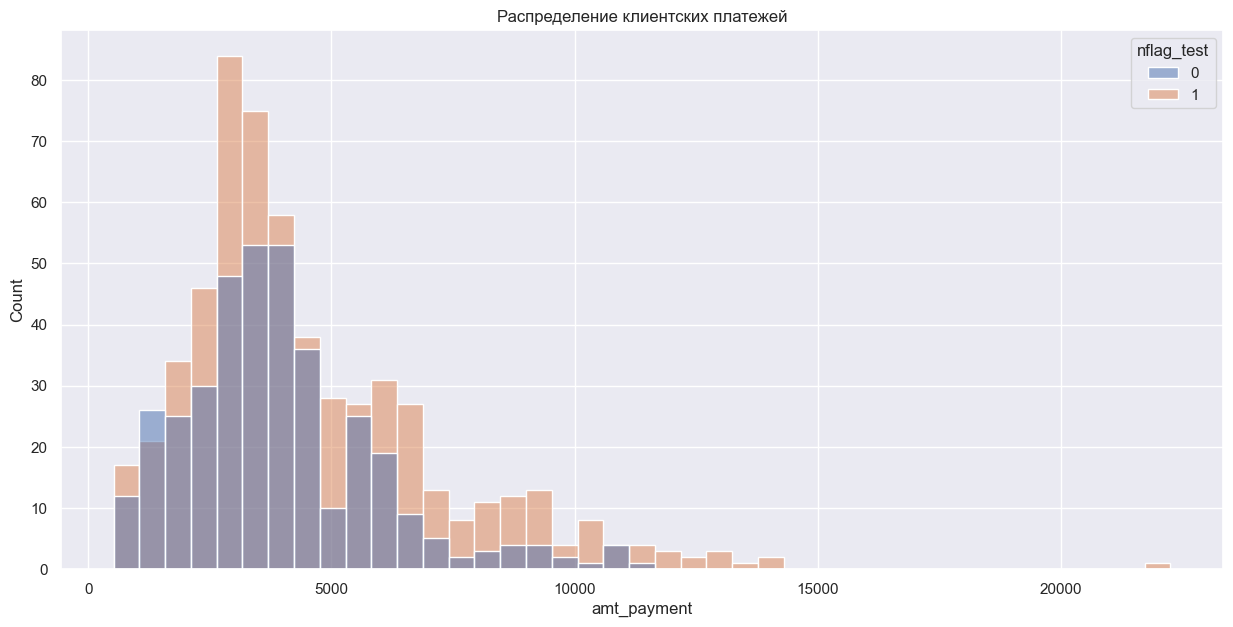

Волгоград
Критерий Стьюдента =  -2.0892718943323443 p-vlaue =  0.03686899928098654
Гипотеза H0 не подтверждается: средние не равны
Разница средних =  -312.89040013337035
Число торговых точек: 1360


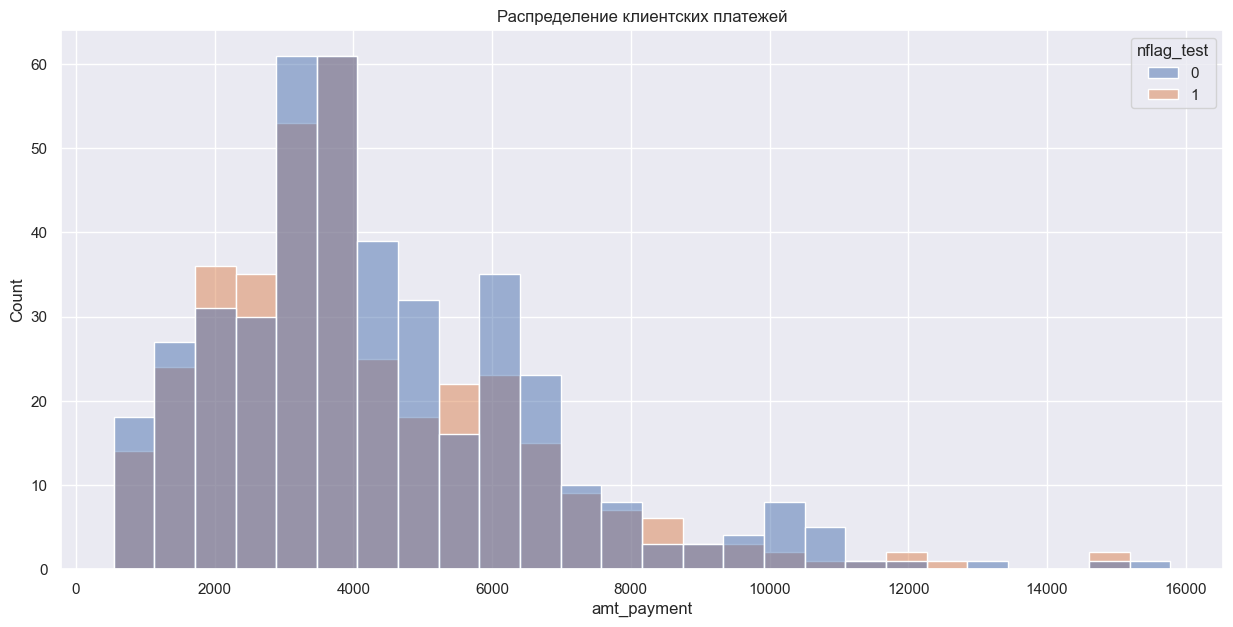

Сочи
Критерий Стьюдента =  -1.5432162776667728 p-vlaue =  0.12297605685687794
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Число торговых точек: 1602


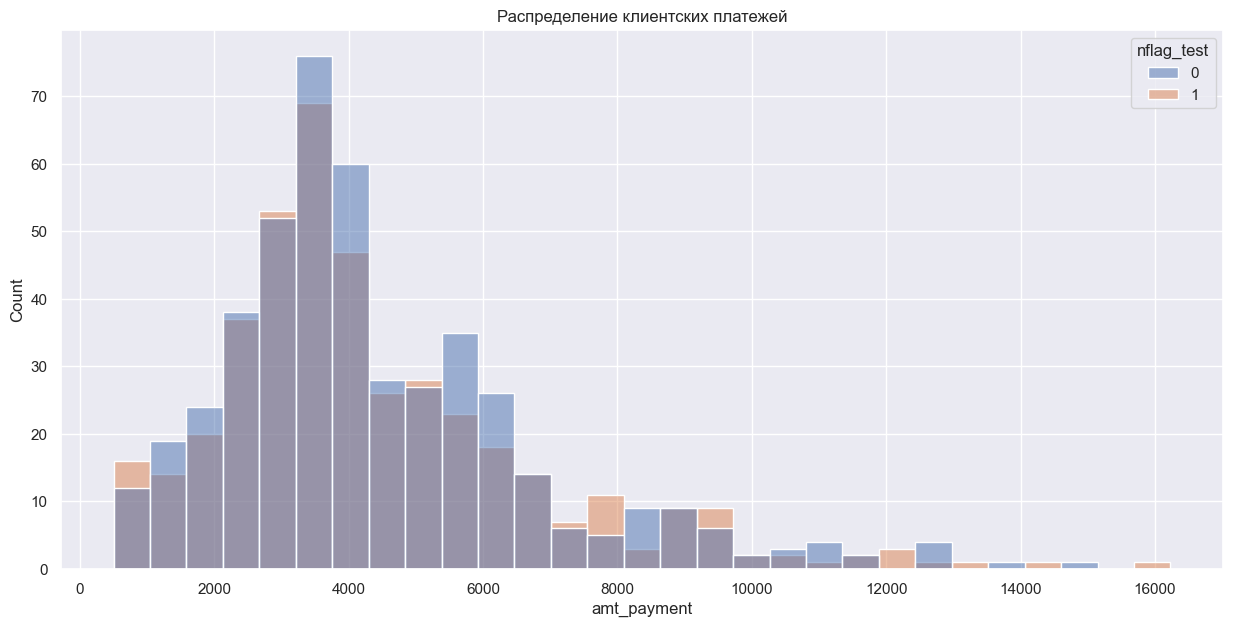

Краснодар
Критерий Стьюдента =  -1.718766529966594 p-vlaue =  0.085800112916198
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Число торговых точек: 2163


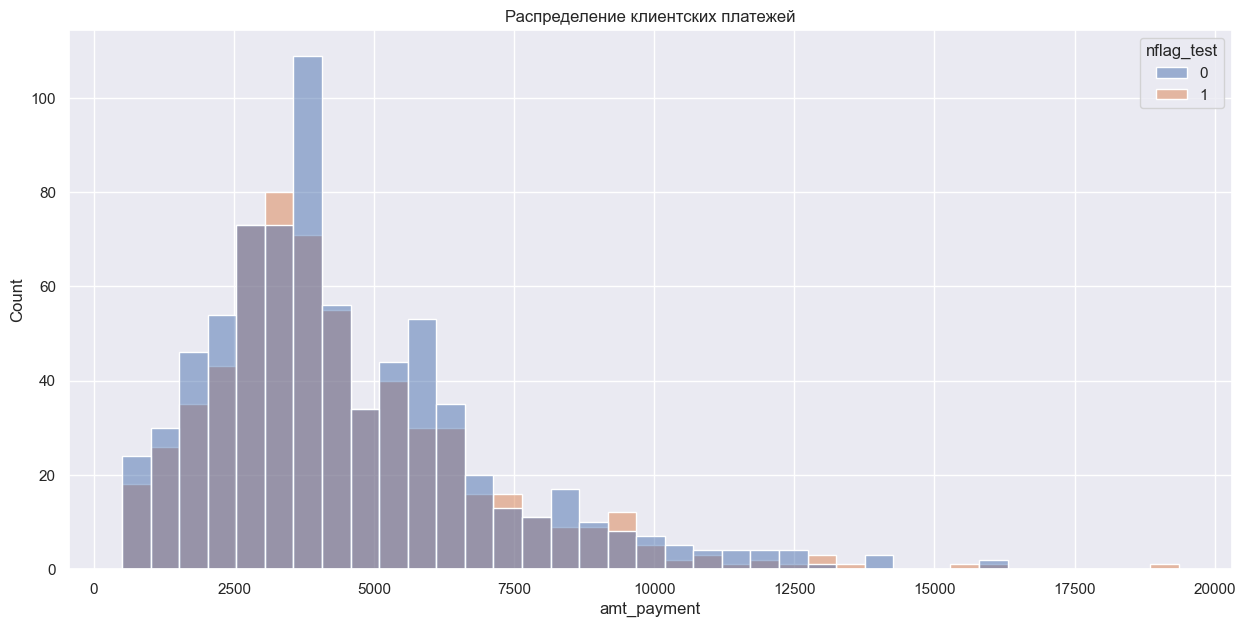

Дмитров
Критерий Стьюдента =  0.3310524347645207 p-vlaue =  0.7410763125801646
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Число торговых точек: 149


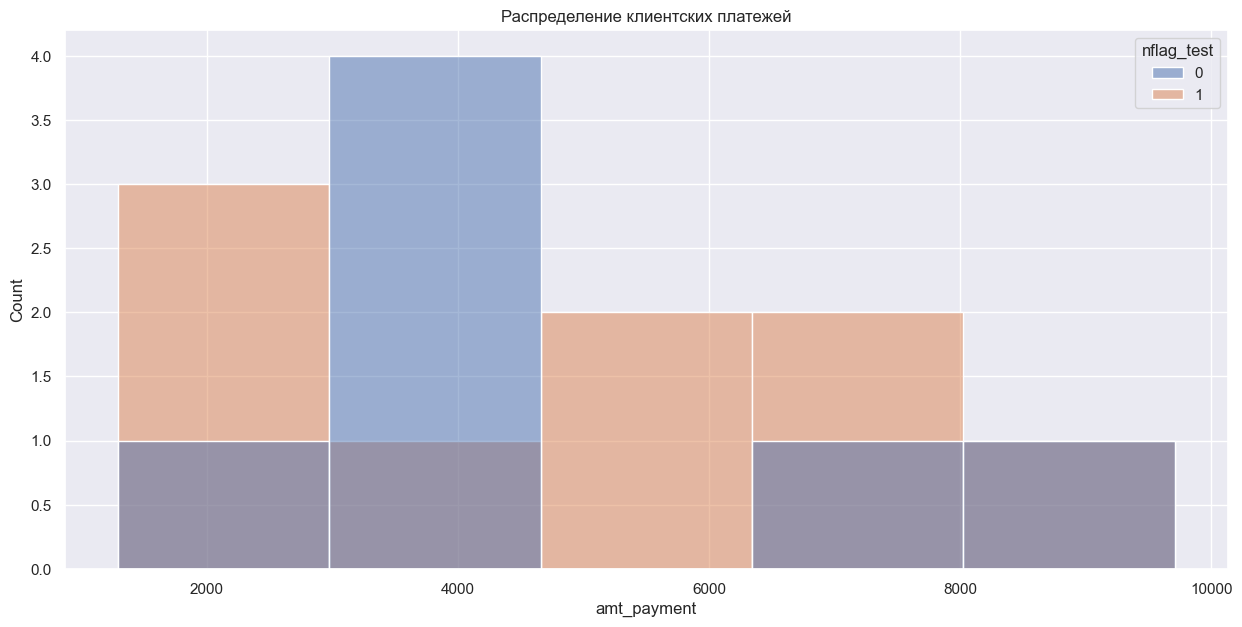

Тюмень
Критерий Стьюдента =  0.9264590634677944 p-vlaue =  0.3550227648604757
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Число торговых точек: 276


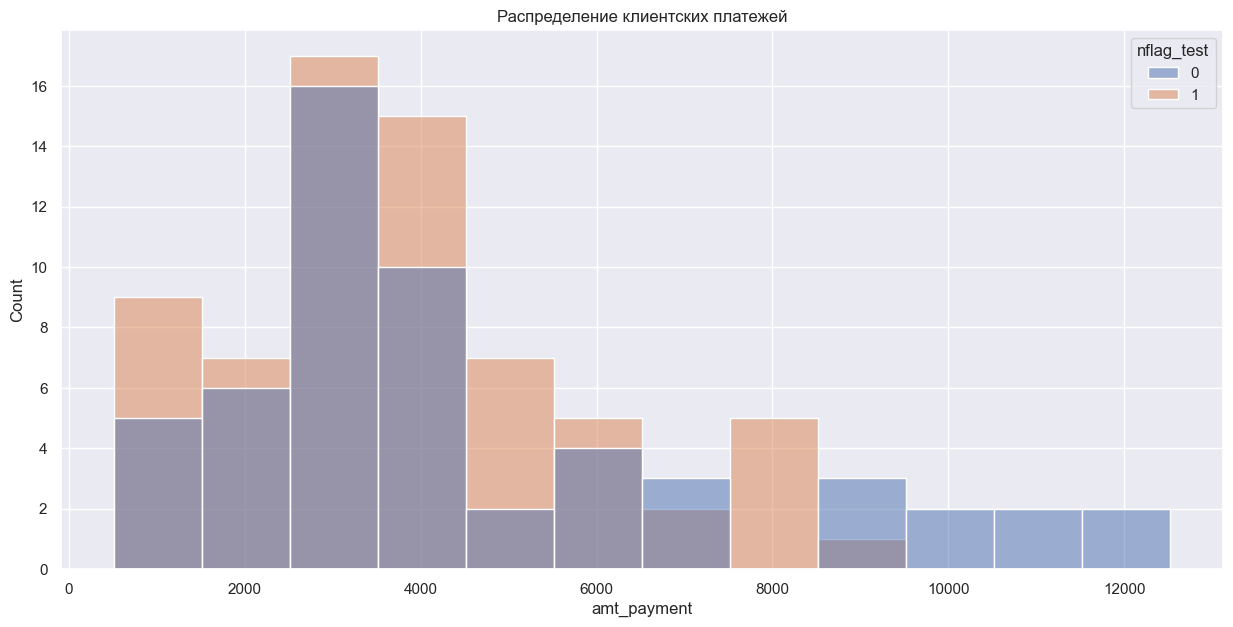

Сахалинск
Критерий Стьюдента =  1.6270604929283115 p-vlaue =  0.105809212549273
Гипотеза H0 подтверждается: средние равны
Разница средних = 0
Число торговых точек: 153


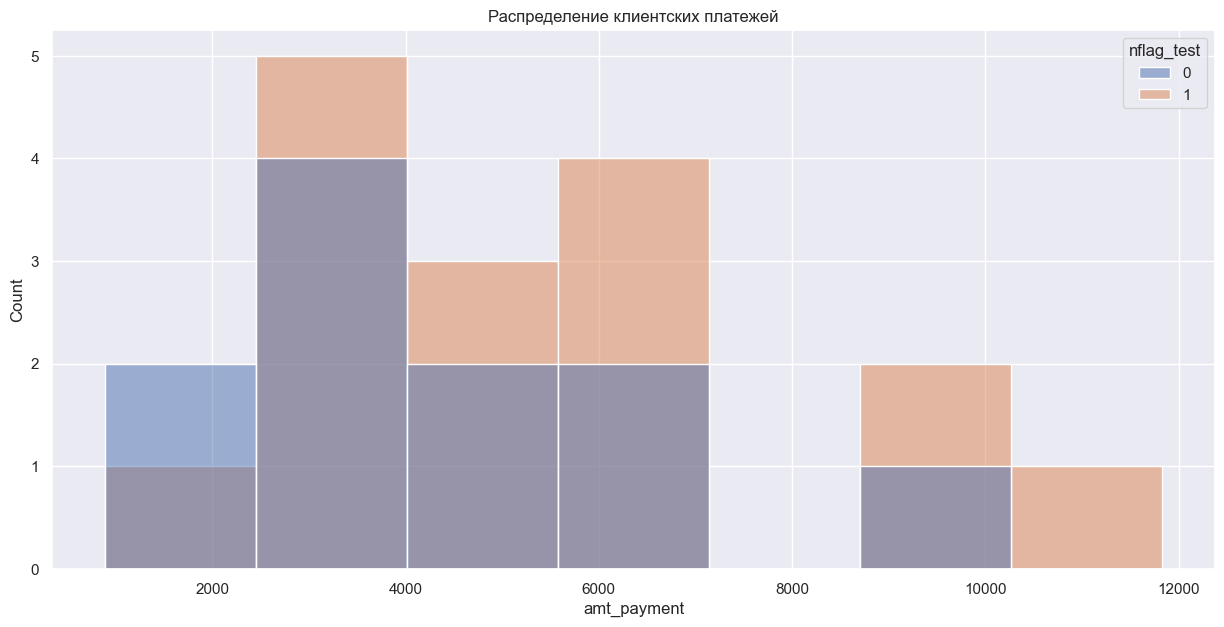

In [121]:
for city in final_df['city'].unique():
    print(city)
    df_city = final_df[final_df['city'] == city]
    test_calc(df_city[df_city['nflag_test'] == 1]['amt_payment'], df_city[df_city['nflag_test'] == 0]['amt_payment'])
    trpoints = df_city['id_trading_point'].count()
    print('Число торговых точек:', trpoints)
    sns.histplot(data=df_city[df_city['paid'] == 1], x="amt_payment", hue='nflag_test')
    plt.title('Распределение клиентских платежей')
    plt.show()

**Вывод:** судя во всему, все наши положительные результаты - в основном заслуга крупных городов, где много торговых точек, в остальных же городах статистической разницы между контрольной и тестовой группой нет.

# Сегментация результатов АБ Теста

In [122]:
results = pd.DataFrame()

In [123]:
for city in final_df['city'].unique():
    df_city = final_df[final_df['city'] == city]
    
    for tpoint in df_city['id_trading_point'].unique():
        df_tpoint = df_city[df_city['id_trading_point'] == tpoint]
        
        count_test = len(df_tpoint[df_tpoint['nflag_test'] == 1])
        count_control = len(df_tpoint[df_tpoint['nflag_test'] == 0])
        count_all = count_test + count_control
        
        avg_test = df_tpoint[df_tpoint['nflag_test'] == 1]['amt_payment'].mean()
        avg_control = df_tpoint[df_tpoint['nflag_test'] == 0]['amt_payment'].mean()
        diff = avg_test - avg_control
        
        sigma_test = df_tpoint[df_tpoint['nflag_test'] == 1]['amt_payment'].std()
        sigma_control = df_tpoint[df_tpoint['nflag_test'] == 0]['amt_payment'].std()
        
        s,p = ttest_ind(df_tpoint[df_tpoint['nflag_test'] == 1]['amt_payment'], df_tpoint[df_tpoint['nflag_test'] == 0]['amt_payment'])
        
        results = results.append({'city':city, 'id_trading_point':tpoint, 'count_test':count_test,
                                  'count_control':count_control, 'count_all':count_all, 'avg_test':avg_test,
                                 'avg_control':avg_control, 'diff': diff, 'sigma_test':sigma_test, 
                                 'sigma_control':sigma_control, 'ttest':s, 'pvalue_ttest':p}, ignore_index=True)

C:\Users\lybas\AppData\Local\Temp\ipykernel_14612\2145062059.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':city, 'id_trading_point':tpoint, 'count_test':count_test,
C:\Users\lybas\AppData\Local\Temp\ipykernel_14612\2145062059.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':city, 'id_trading_point':tpoint, 'count_test':count_test,
C:\Users\lybas\AppData\Local\Temp\ipykernel_14612\2145062059.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':city, 'id_trading_point':tpoint, 'count_test':count_test,
C:\Users\lybas\AppData\Local\Temp\ipykernel_14612\2145062059.py:20: FutureWarning: The frame.append method is deprecat

C:\Users\lybas\AppData\Local\Temp\ipykernel_14612\2145062059.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':city, 'id_trading_point':tpoint, 'count_test':count_test,
C:\Users\lybas\AppData\Local\Temp\ipykernel_14612\2145062059.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':city, 'id_trading_point':tpoint, 'count_test':count_test,
C:\Users\lybas\AppData\Local\Temp\ipykernel_14612\2145062059.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'city':city, 'id_trading_point':tpoint, 'count_test':count_test,
C:\Users\lybas\AppData\Local\Temp\ipykernel_14612\2145062059.py:20: FutureWarning: The frame.append method is deprecat

In [124]:
results['percent_count'] = results['count_all'] / results['count_all'].sum()

In [125]:
results['flag'] = None
for index, value in results['id_trading_point'].items():
    if results.loc[index, 'diff'] > 0 and results.loc[index, 'pvalue_ttest'] < 0.05:
        results.loc[index, 'flag'] = 'positive'
    elif results.loc[index, 'diff'] < 0 and results.loc[index, 'pvalue_ttest'] < 0.05:
        results.loc[index, 'flag'] = 'negative'
    else:
        results.loc[index, 'flag'] = 'neutral'

In [126]:
results

,city,id_trading_point,count_test,count_control,count_all,avg_test,avg_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest,percent_count,flag
0,Санкт-Петербург,453.0,1066,1049,2115,2501.966229,1889.923737,612.042492,2993.442540,2648.659303,4.976910,6.983207e-07,0.046670,positive
1,Санкт-Петербург,112.0,652,683,1335,2488.115031,2218.636896,269.478135,2778.179183,2780.790660,1.770712,7.683710e-02,0.029458,neutral
2,Санкт-Петербург,117.0,625,587,1212,2582.297600,2050.691652,531.605948,2835.004503,2595.737792,3.398196,7.003817e-04,0.026744,positive
3,Санкт-Петербург,309.0,240,238,478,2706.279167,2392.894958,313.384209,2814.939849,2761.938716,1.228455,2.198834e-01,0.010548,neutral
4,Санкт-Петербург,576.0,630,657,1287,1594.436508,1342.129376,252.307132,2683.727211,2415.822664,1.774073,7.628783e-02,0.028399,neutral
5,Санкт-Петербург,900.0,335,341,676,2450.991045,1689.791789,761.199256,2865.607356,2492.472611,3.686914,2.452534e-04,0.014917,positive
6,Санкт-Петербург,213.0,232,255,487,2977.629310,2277.611765,700.017546,2905.494362,2710.043413,2.750752,6.168215e-03,0.010746,positive
7,Санкт-Петербург,801.0,225,212,437,2925.142222,2352.283019,572.859203,2774.292063,2928.285838,2.099991,3.630501e-02,0.009643,positive
8,Санкт-Петербург,573.0,177,160,337,2929.045198,1641.212500,1287.832698,3201.098137,2619.044781,4.016569,7.294074e-05,0.007436,positive
9,Санкт-Петербург,891.0,159,167,326,2618.949686,1980.658683,638.291003,2899.782464,2489.571942,2.135593,3.346204e-02,0.007194,positive


In [127]:
pip install XlsxWriter

Note: you may need to restart the kernel to use updated packages.


In [128]:
df_pos = results[results['flag'] == 'positive']
df_neg = results[results['flag'] == 'negative']
df_neu = results[results['flag'] == 'neutral']

In [129]:
writer = pd.ExcelWriter("результаты.xlsx", engine= "xlsxwriter")

In [130]:
df_pos.to_excel(writer, sheet_name="positive")
df_neg.to_excel(writer, sheet_name="negative")
df_neu.to_excel(writer, sheet_name="neutral")

In [131]:
writer.close()